In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import mat, cov, mean, hstack, multiply,sqrt,diag, \
    squeeze, ones, array, vstack, kron, zeros, eye, savez_compressed
from numpy.linalg import inv
from scipy.stats import chi2
import statsmodels.api as sm


# PART 1: 
## Download the Fama-French portfolios and the Fama-French factors from Kenneth French’s homepage. Use the equally weighted portfolios, monthly data for 1960-today. Construct excess returns of the portfolios by subtracting the risk-free rate.

### Importing Data

In [57]:
#IMPORTING Datas From 60s
df_portfolios = pd.read_csv('data3_from60s.csv', delimiter=";")

In [58]:
df_portfolios

,Average Equal Weighted Returns -- Monthly,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,196001,-4.7424,-3.9909,-0.5861,-0.8173,0.1180,-3.4035,-6.2947,-2.0203,-3.1132,...,-5.5997,-4.1054,-6.2418,-7.2440,-2.6881,-6.8546,-4.9918,-5.1334,-5.5398,-6.0410
1,196002,-2.3724,2.1179,-0.9124,-0.9412,0.4768,1.0297,3.1611,1.5880,2.1434,...,1.8222,1.5433,1.7003,0.6597,1.4765,2.9973,0.2723,0.6425,-3.3934,-4.0763
2,196003,-2.2218,-5.0762,-3.7087,-1.5271,-2.8071,-3.5638,-2.8796,-2.5178,-2.4235,...,-0.7345,-0.2144,-3.9025,-4.6159,-6.0261,-0.1042,-1.6669,-0.9430,-3.2461,-6.1023
3,196004,-4.2483,-1.4209,-2.3759,-3.3076,-3.1045,2.0600,-4.1662,-1.6101,-1.5699,...,-0.2495,-1.1229,-2.4087,-1.8442,-2.8467,-0.0619,-0.9488,-1.6935,-2.6947,-3.6817
4,196005,-4.9509,-1.4987,-2.7492,1.1174,0.5579,2.4917,7.3847,1.5573,1.8168,...,3.4520,1.8290,1.0845,2.0689,0.3527,6.0167,4.2546,0.6655,-0.6506,-1.2758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,202305,4.8001,2.6062,0.9389,-0.0027,-0.4494,2.8388,2.6131,1.9183,-1.3232,...,1.0183,-2.1718,-4.1497,-3.9320,-7.3872,1.7463,-2.3465,-5.3011,-7.7811,-6.7972
761,202306,1.6162,-0.4344,3.8468,5.5106,6.2477,7.7777,7.9629,9.6669,10.2142,...,8.9616,9.6651,9.0011,10.5978,6.9571,7.3616,7.7908,7.4198,5.8409,5.6669
762,202307,0.6834,0.7399,2.0685,7.2261,6.4859,4.0643,4.8509,6.2362,8.4191,...,1.4307,4.3743,5.4175,8.2964,9.1101,2.7158,4.1470,3.5218,6.3926,5.3174
763,202308,-8.7126,-9.9641,-11.9581,-6.0369,-7.6521,-6.6579,-7.0676,-4.4240,-5.4376,...,-1.8818,-1.8618,-2.9529,-3.2571,-1.5167,-2.3561,-3.2481,-3.3090,-4.2421,-6.7162


In [59]:
#IMPORTING Factors From 60s
df_factors = pd.read_csv('FACTORS.csv')

In [60]:
df_factors

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,196001,-6.98,2.09,2.78,0.33
1,196002,1.17,0.51,-1.93,0.29
2,196003,-1.63,-0.49,-2.94,0.35
3,196004,-1.71,0.32,-2.28,0.19
4,196005,3.12,1.21,-3.70,0.27
...,...,...,...,...,...
760,202305,0.35,1.61,-7.72,0.36
761,202306,6.46,1.54,-0.26,0.40
762,202307,3.21,2.08,4.11,0.45
763,202308,-2.39,-3.16,-1.06,0.45


In [61]:
marketret = df_factors['Mkt-RF'] + df_factors['RF']

### Working on the Dataset and construction excess returns

In [62]:
#Drop first Column of the Factors
df_factors = df_factors.drop('Unnamed: 0', axis=1)


In [63]:
df_factors

,Mkt-RF,SMB,HML,RF
0,-6.98,2.09,2.78,0.33
1,1.17,0.51,-1.93,0.29
2,-1.63,-0.49,-2.94,0.35
3,-1.71,0.32,-2.28,0.19
4,3.12,1.21,-3.70,0.27
...,...,...,...,...
760,0.35,1.61,-7.72,0.36
761,6.46,1.54,-0.26,0.40
762,3.21,2.08,4.11,0.45
763,-2.39,-3.16,-1.06,0.45


In [64]:
#Concatenate Data and Factors
df_conc = pd.concat([df_portfolios,df_factors], axis=1)

In [65]:
df_conc

,Average Equal Weighted Returns -- Monthly,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,...,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF,SMB,HML,RF
0,196001,-4.7424,-3.9909,-0.5861,-0.8173,0.1180,-3.4035,-6.2947,-2.0203,-3.1132,...,-2.6881,-6.8546,-4.9918,-5.1334,-5.5398,-6.0410,-6.98,2.09,2.78,0.33
1,196002,-2.3724,2.1179,-0.9124,-0.9412,0.4768,1.0297,3.1611,1.5880,2.1434,...,1.4765,2.9973,0.2723,0.6425,-3.3934,-4.0763,1.17,0.51,-1.93,0.29
2,196003,-2.2218,-5.0762,-3.7087,-1.5271,-2.8071,-3.5638,-2.8796,-2.5178,-2.4235,...,-6.0261,-0.1042,-1.6669,-0.9430,-3.2461,-6.1023,-1.63,-0.49,-2.94,0.35
3,196004,-4.2483,-1.4209,-2.3759,-3.3076,-3.1045,2.0600,-4.1662,-1.6101,-1.5699,...,-2.8467,-0.0619,-0.9488,-1.6935,-2.6947,-3.6817,-1.71,0.32,-2.28,0.19
4,196005,-4.9509,-1.4987,-2.7492,1.1174,0.5579,2.4917,7.3847,1.5573,1.8168,...,0.3527,6.0167,4.2546,0.6655,-0.6506,-1.2758,3.12,1.21,-3.70,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,202305,4.8001,2.6062,0.9389,-0.0027,-0.4494,2.8388,2.6131,1.9183,-1.3232,...,-7.3872,1.7463,-2.3465,-5.3011,-7.7811,-6.7972,0.35,1.61,-7.72,0.36
761,202306,1.6162,-0.4344,3.8468,5.5106,6.2477,7.7777,7.9629,9.6669,10.2142,...,6.9571,7.3616,7.7908,7.4198,5.8409,5.6669,6.46,1.54,-0.26,0.40
762,202307,0.6834,0.7399,2.0685,7.2261,6.4859,4.0643,4.8509,6.2362,8.4191,...,9.1101,2.7158,4.1470,3.5218,6.3926,5.3174,3.21,2.08,4.11,0.45
763,202308,-8.7126,-9.9641,-11.9581,-6.0369,-7.6521,-6.6579,-7.0676,-4.4240,-5.4376,...,-1.5167,-2.3561,-3.2481,-3.3090,-4.2421,-6.7162,-2.39,-3.16,-1.06,0.45


In [66]:
#Calculate the excess return, removing the risk free rate from every value except Factors and Date.

columns_to_keep = ['  Average Equal Weighted Returns -- Monthly'] + list(df_conc.columns[-4:])

df_excess_returns = df_conc[columns_to_keep].copy()

# Get the 'RF' column (last column)
rf_column = df_conc.iloc[:, -1]

# Subtract the value of 'RF' only from the middle columns
for column in df_conc.columns[1:-4]:  # Excluding the 1 column (Date) and the last 4 columns (Factors)
    df_excess_returns[column] = df_conc[column] - rf_column

# Print DataFrame 'excess returns'
df_excess_returns

,Average Equal Weighted Returns -- Monthly,Mkt-RF,SMB,HML,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
0,196001,-6.98,2.09,2.78,0.33,-5.0724,-4.3209,-0.9161,-1.1473,-0.2120,...,-5.9297,-4.4354,-6.5718,-7.5740,-3.0181,-7.1846,-5.3218,-5.4634,-5.8698,-6.3710
1,196002,1.17,0.51,-1.93,0.29,-2.6624,1.8279,-1.2024,-1.2312,0.1868,...,1.5322,1.2533,1.4103,0.3697,1.1865,2.7073,-0.0177,0.3525,-3.6834,-4.3663
2,196003,-1.63,-0.49,-2.94,0.35,-2.5718,-5.4262,-4.0587,-1.8771,-3.1571,...,-1.0845,-0.5644,-4.2525,-4.9659,-6.3761,-0.4542,-2.0169,-1.2930,-3.5961,-6.4523
3,196004,-1.71,0.32,-2.28,0.19,-4.4383,-1.6109,-2.5659,-3.4976,-3.2945,...,-0.4395,-1.3129,-2.5987,-2.0342,-3.0367,-0.2519,-1.1388,-1.8835,-2.8847,-3.8717
4,196005,3.12,1.21,-3.70,0.27,-5.2209,-1.7687,-3.0192,0.8474,0.2879,...,3.1820,1.5590,0.8145,1.7989,0.0827,5.7467,3.9846,0.3955,-0.9206,-1.5458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,202305,0.35,1.61,-7.72,0.36,4.4401,2.2462,0.5789,-0.3627,-0.8094,...,0.6583,-2.5318,-4.5097,-4.2920,-7.7472,1.3863,-2.7065,-5.6611,-8.1411,-7.1572
761,202306,6.46,1.54,-0.26,0.40,1.2162,-0.8344,3.4468,5.1106,5.8477,...,8.5616,9.2651,8.6011,10.1978,6.5571,6.9616,7.3908,7.0198,5.4409,5.2669
762,202307,3.21,2.08,4.11,0.45,0.2334,0.2899,1.6185,6.7761,6.0359,...,0.9807,3.9243,4.9675,7.8464,8.6601,2.2658,3.6970,3.0718,5.9426,4.8674
763,202308,-2.39,-3.16,-1.06,0.45,-9.1626,-10.4141,-12.4081,-6.4869,-8.1021,...,-2.3318,-2.3118,-3.4029,-3.7071,-1.9667,-2.8061,-3.6981,-3.7590,-4.6921,-7.1662


In [67]:
#Calcolate the mean for every of the 25 portfolios over all years

df_excess_returns.columns
mean_columns = df_excess_returns.iloc[:, 5:].mean().tolist()

mean_columns

[0.3558823529411765,
 0.726567320261438,
 0.8672164705882355,
 1.026555816993464,
 1.2768665359477125,
 0.4324367320261437,
 0.7508473202614379,
 0.8742767320261438,
 0.868157385620915,
 0.9965396078431372,
 0.5003355555555555,
 0.790155816993464,
 0.7194341176470589,
 0.8649896732026144,
 0.9803537254901961,
 0.5859216993464053,
 0.6478716339869282,
 0.7235199999999999,
 0.8360932026143791,
 0.8812754248366013,
 0.5269513725490197,
 0.627783137254902,
 0.6403086274509804,
 0.5851849673202614,
 0.7116938562091503]

In [68]:
media_mk_excess = df_factors['Mkt-RF'].mean()
media_mk_excess

0.5518039215686275

In [69]:
risk_free_mean = df_excess_returns['RF'].mean()
print(risk_free_mean)

0.3540653594771242


# PART 2:
## Reproduce the figures below (taken from J.H.Cochrane, asset pricing, chapter 20).Run CAPM regressions on the excess returns, where Mkt-RF is taken to be the market excess return. Plot the results (a scatter plot of predicted against actual average excess returns).

### Computing Betas

In [70]:
# List of the portfolios:

portfolios = ['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3','ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3', 'ME4 BM4','ME4 BM5','BIG LoBM','ME5 BM2','ME5 BM3','ME5 BM4','BIG HiBM']

# Dictionary in which to save the regressions results:
regression_results = {}

# Iterate over all portfolios
for portfolio_of_interest in portfolios:
    # Dependent Variable: portfolio excess return
    y_capm = df_excess_returns[portfolio_of_interest]
    # Independent Variable: market excess return with first column of ones
    X_capm = sm.add_constant(df_conc['Mkt-RF'])

    # Solve the equation using Matrix Algebra
    beta_capm = np.linalg.inv(X_capm.T @ X_capm) @ X_capm.T @ y_capm

    # Extract Alfas and Betas
    alfa_capm = beta_capm[0]
    beta_capm = beta_capm[1]

    # Save the results in the Dictionary
    regression_results[portfolio_of_interest] = {'Alfa': alfa_capm, 'Beta': beta_capm}

# Print the results
for portfolio_of_interest, results in regression_results.items():
    print(f'Results for the portfolio {portfolio_of_interest}:')
    print(f'Alfa (α): {results["Alfa"]}')
    print(f'Beta (β): {results["Beta"]}')
    print()


Results for the portfolio SMALL LoBM:
Alfa (α): -0.3992237800673871
Beta (β): 1.3684319800809024

Results for the portfolio ME1 BM2:
Alfa (α): 0.0525291128676915
Beta (β): 1.2215176098742468

Results for the portfolio ME1 BM3:
Alfa (α): 0.25295971675357615
Beta (β): 1.1131793918544401

Results for the portfolio ME1 BM4:
Alfa (α): 0.4628634831574324
Beta (β): 1.0215446317119468

Results for the portfolio SMALL HiBM:
Alfa (α): 0.7136205414122452
Beta (β): 1.020735758699055

Results for the portfolio ME2 BM1:
Alfa (α): -0.3561682860681048
Beta (β): 1.4291399304529422

Results for the portfolio ME2 BM2:
Alfa (α): 0.0726371999139717
Beta (β): 1.2290781087954228

Results for the portfolio ME2 BM3:
Alfa (α): 0.26047865899689016
Beta (β): 1.1123481530982848

Results for the portfolio ME2 BM4:
Alfa (α): 0.2897524779960242
Beta (β): 1.0482073160709755

Results for the portfolio ME2 BM5:
Alfa (α): 0.3332705520838007
Beta (β): 1.2020013447418867

Results for the portfolio ME3 BM1:
Alfa (α): -0.254

In [71]:
#Transform Betas in List, extracting the betas from the dictionary

beta_values = [regression_results[key]['Beta'] for key in regression_results]
print(beta_values)

[1.3684319800809024, 1.2215176098742468, 1.1131793918544401, 1.0215446317119468, 1.020735758699055, 1.4291399304529422, 1.2290781087954228, 1.1123481530982848, 1.0482073160709755, 1.2020013447418867, 1.3671727420984998, 1.1468310395950352, 1.057208926696685, 1.032751797866006, 1.1348454156419365, 1.2427978012956535, 1.1020566318749334, 1.0394217824497627, 1.0324519614762173, 1.134460542039124, 1.1006132188979298, 0.9863609137494778, 0.9371773672935069, 0.9189950866620619, 0.9875937118538739]


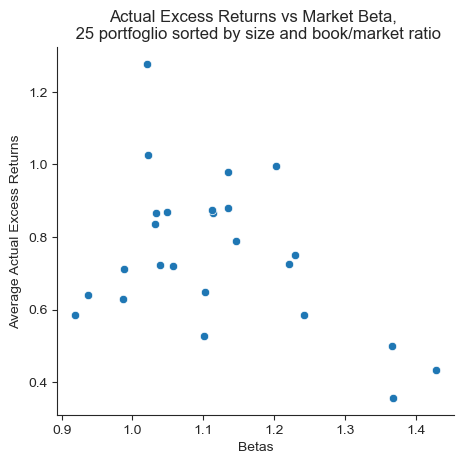

In [72]:
#Plot the 25s Mean Actual Excess Returns against Betas

sns.set_style("ticks")
sns.relplot(kind = "scatter",
            x  = beta_values , 
            y = mean_columns)
plt.xlabel("Betas")
plt.ylabel("Average Actual Excess Returns")
plt.title('Actual Excess Returns vs Market Beta, \n 25 portfoglio sorted by size and book/market ratio')
plt.tight_layout(pad=2.0)
plt.savefig("my_plot.png")
plt.show()

### Reproduce the figures below (taken from J.H.Cochrane, asset pricing, chapter 20)

#### Connect Portfolios , with same Book to Market Ratios over different Size.

In [73]:
#SLICING DATASET FOR MARKET BOOK RATIOS

df_excess_returns.columns[5::5]
Low_book_market_stocks1 = df_excess_returns[df_excess_returns.columns[5::5]]

df_excess_returns.columns[5::5]
Low_book_market_stocks2 = df_excess_returns[df_excess_returns.columns[6::5]]

df_excess_returns.columns[5::5]
Low_book_market_stocks3 = df_excess_returns[df_excess_returns.columns[7::5]]

df_excess_returns.columns[5::5]
Low_book_market_stocks4 = df_excess_returns[df_excess_returns.columns[8::5]]

df_excess_returns.columns[5::5]
Low_book_market_stocks5 = df_excess_returns[df_excess_returns.columns[9::5]]


LowBMstock1 = Low_book_market_stocks1.mean().tolist()
LowBMstock2 = Low_book_market_stocks2.mean().tolist()
LowBMstock3 = Low_book_market_stocks3.mean().tolist()
LowBMstock4 = Low_book_market_stocks4.mean().tolist()
LowBMstock5 = Low_book_market_stocks5.mean().tolist()

In [74]:
#SLICING BETAS FOR MARKET BOOK RATIOS

Low_book_market_beta1 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[::5]]
Low_book_market_beta2 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[1::5]]
Low_book_market_beta3 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[2::5]]
Low_book_market_beta4 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[3::5]]
Low_book_market_beta5 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[4::5]]


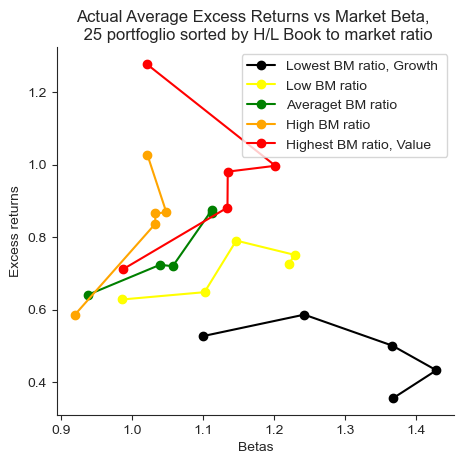

In [75]:
#Plotting

sns.set_style("ticks")
sns.relplot(kind = "scatter",
            x  = beta_values , 
            y = mean_columns)
plt.xlabel("Betas")
plt.ylabel("Excess returns")
plt.title('Actual Average Excess Returns vs Market Beta, \n 25 portfoglio sorted by H/L Book to market ratio')

plt.plot(Low_book_market_beta1, LowBMstock1, color = 'black', linestyle = '-', marker = 'o', label = 'Lowest BM ratio, Growth ')
plt.plot(Low_book_market_beta2, LowBMstock2, color = 'yellow', linestyle = '-', marker = 'o', label = 'Low BM ratio')
plt.plot(Low_book_market_beta3, LowBMstock3, color = 'green', linestyle = '-', marker = 'o', label = 'Averaget BM ratio')
plt.plot(Low_book_market_beta4, LowBMstock4, color = 'orange', linestyle = '-', marker ='o', label = 'High BM ratio')
plt.plot(Low_book_market_beta5, LowBMstock5, color = 'red', linestyle = '-', marker = 'o', label = 'Highest BM ratio, Value')
plt.legend()

plt.tight_layout(pad=2.0)
plt.savefig("plot1.png")
plt.show()

#### Connect Portfolios, with same Size over different Book to Market Ratios

In [76]:
#SLICING DATASET FOR SIZE

media_prime_5_colonne1 = mean_columns[:5]
media_prime_5_colonne2 = mean_columns[5:10]
media_prime_5_colonne3 = mean_columns[10:15]
media_prime_5_colonne4 = mean_columns[15:20]
media_prime_5_colonne5 = mean_columns[20:25]

In [77]:
#SLICING BETAS FOR MARKET BOOK RATIOS

valori_beta_primi_5_1 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[:5]]
valori_beta_primi_5_2 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[5:10]]
valori_beta_primi_5_3 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[10:15]]
valori_beta_primi_5_4 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[15:20]]
valori_beta_primi_5_5 = [regression_results[key]['Beta'] for key in list(regression_results.keys())[20:25]]


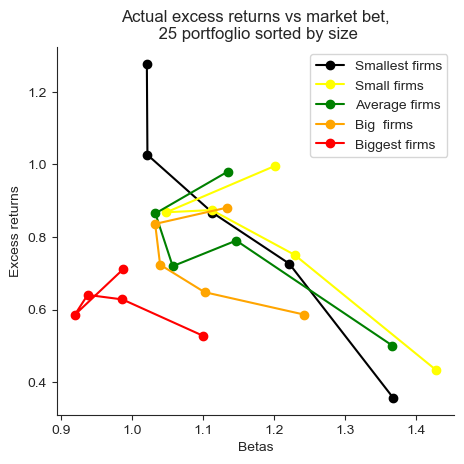

In [78]:
#Plotting

sns.set_style("ticks")
sns.relplot(kind = "scatter",
            x = beta_values, 
            y = mean_columns)
plt.xlabel("Betas")
plt.ylabel("Excess returns")
plt.title('Actual excess returns vs market bet,\n 25 portfoglio sorted by size')

plt.plot(valori_beta_primi_5_1, media_prime_5_colonne1, color = 'black', linestyle = '-', marker = 'o', label = 'Smallest firms')
plt.plot(valori_beta_primi_5_2, media_prime_5_colonne2, color = 'yellow', linestyle = '-', marker = 'o', label = 'Small firms')
plt.plot(valori_beta_primi_5_3, media_prime_5_colonne3, color = 'green', linestyle = '-', marker = 'o', label = 'Average firms')
plt.plot(valori_beta_primi_5_4, media_prime_5_colonne4, color = 'orange', linestyle = '-', marker = 'o', label = 'Big  firms')
plt.plot(valori_beta_primi_5_5, media_prime_5_colonne5, color = 'red', linestyle = '-', marker = 'o', label = 'Biggest firms')
plt.legend()
plt.tight_layout(pad=2.0)
plt.savefig("plot2.png")
plt.show()

### Plotting predicted against actual average 

In [79]:
# Dictionary in which to save CAPM Predicted Excess Returns:
predicted_excess_returns = {}
 
# Iterate over all portfolios
for portfolio_of_interest in portfolios:
    # Extract Regression Result for the current Portfolio    
    portfolio_results = regression_results[portfolio_of_interest]

    # Excess Return of the Market
    mk_excess = df_conc['Mkt-RF']

    # Calculate CAPM Predicted Excess Returns
    predicted_excess_returns[portfolio_of_interest] = portfolio_results['Beta'] * mk_excess # + portfolio_results['Alfa']

# Print Predicted Excess Returns for each Portfolio 
for portfolio_of_interest, predicted_excess_returns in predicted_excess_returns.items():
    print(f'CAPM Predicted Excess Returns for the Portfolio {portfolio_of_interest}:')
    print(predicted_excess_returns)
    print()

CAPM Predicted Excess Returns for the Portfolio SMALL LoBM:
0     -9.551655
1      1.601065
2     -2.230544
3     -2.340019
4      4.269508
         ...   
760    0.478951
761    8.840071
762    4.392667
763   -3.270552
764   -7.170584
Name: Mkt-RF, Length: 765, dtype: float64

CAPM Predicted Excess Returns for the Portfolio ME1 BM2:
0     -8.526193
1      1.429176
2     -1.991074
3     -2.088795
4      3.811135
         ...   
760    0.427531
761    7.891004
762    3.921072
763   -2.919427
764   -6.400752
Name: Mkt-RF, Length: 765, dtype: float64

CAPM Predicted Excess Returns for the Portfolio ME1 BM3:
0     -7.769992
1      1.302420
2     -1.814482
3     -1.903537
4      3.473120
         ...   
760    0.389613
761    7.191139
762    3.573306
763   -2.660499
764   -5.833060
Name: Mkt-RF, Length: 765, dtype: float64

CAPM Predicted Excess Returns for the Portfolio ME1 BM4:
0     -7.130382
1      1.195207
2     -1.665118
3     -1.746841
4      3.187219
         ...   
760    0.357541


In [80]:
# Dictionary with Predicted CAPM Excess Returns for each Portfolio
predicted_excess_returns = {
    'Rendimento_Mercato': df_conc['Mkt-RF']}

# Add Predicted CAPM Excess Returns for each Portfolio in the Dictionary 
for portfolio_of_interest in portfolios:
    predicted_excess_returns[portfolio_of_interest] = regression_results[portfolio_of_interest]['Beta'] * df_conc['Mkt-RF']

# Create DataFrame using the Dictionary
df_predicted_excess_returns = pd.DataFrame(predicted_excess_returns)

print(df_predicted_excess_returns)

     Rendimento_Mercato  SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM  \
0                 -6.98   -9.551655 -8.526193 -7.769992 -7.130382   -7.124736   
1                  1.17    1.601065  1.429176  1.302420  1.195207    1.194261   
2                 -1.63   -2.230544 -1.991074 -1.814482 -1.665118   -1.663799   
3                 -1.71   -2.340019 -2.088795 -1.903537 -1.746841   -1.745458   
4                  3.12    4.269508  3.811135  3.473120  3.187219    3.184696   
..                  ...         ...       ...       ...       ...         ...   
760                0.35    0.478951  0.427531  0.389613  0.357541    0.357258   
761                6.46    8.840071  7.891004  7.191139  6.599178    6.593953   
762                3.21    4.392667  3.921072  3.573306  3.279158    3.276562   
763               -2.39   -3.270552 -2.919427 -2.660499 -2.441492   -2.439558   
764               -5.24   -7.170584 -6.400752 -5.833060 -5.352894   -5.348655   

      ME2 BM1   ME2 BM2   M

In [81]:
df_predicted_excess_returns = pd.DataFrame(predicted_excess_returns)

In [82]:
df_predicted_excess_returns = df_predicted_excess_returns.iloc[:, 1:]
print(df_predicted_excess_returns)


     SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1   ME2 BM2  \
0     -9.551655 -8.526193 -7.769992 -7.130382   -7.124736 -9.975397 -8.578965   
1      1.601065  1.429176  1.302420  1.195207    1.194261  1.672094  1.438021   
2     -2.230544 -1.991074 -1.814482 -1.665118   -1.663799 -2.329498 -2.003397   
3     -2.340019 -2.088795 -1.903537 -1.746841   -1.745458 -2.443829 -2.101724   
4      4.269508  3.811135  3.473120  3.187219    3.184696  4.458917  3.834724   
..          ...       ...       ...       ...         ...       ...       ...   
760    0.478951  0.427531  0.389613  0.357541    0.357258  0.500199  0.430177   
761    8.840071  7.891004  7.191139  6.599178    6.593953  9.232244  7.939845   
762    4.392667  3.921072  3.573306  3.279158    3.276562  4.587539  3.945341   
763   -3.270552 -2.919427 -2.660499 -2.441492   -2.439558 -3.415644 -2.937497   
764   -7.170584 -6.400752 -5.833060 -5.352894   -5.348655 -7.488693 -6.440369   

      ME2 BM3   ME2 BM4   M

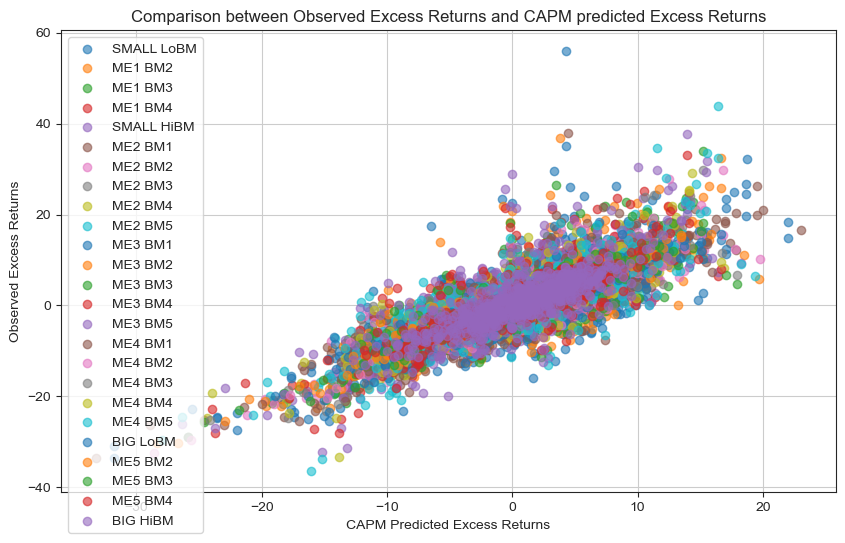

In [83]:
# Comparison between ALL Excess Returns predicted by CAPM and Real Excess Returns
plt.figure(figsize=(10, 6))

for portfolio_of_interest in portfolios:
    observed_data = df_excess_returns[portfolio_of_interest]
    CAPM_data = df_predicted_excess_returns[portfolio_of_interest]

    # Disegna uno scatter plot
    plt.scatter(CAPM_data, observed_data, label = portfolio_of_interest, alpha=0.6)
    

plt.xlabel('CAPM Predicted Excess Returns')
plt.ylabel('Observed Excess Returns')
plt.title('Comparison between Observed Excess Returns and CAPM predicted Excess Returns')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# Calculate the mean of every portfolio over all years
mean_predicted_excess_returns = df_predicted_excess_returns.mean().tolist()

In [85]:
mean_predicted_excess_returns

[0.755106133008564,
 0.6740382073937461,
 0.6142567538346599,
 0.5636923338360315,
 0.5632459945354668,
 0.7886050180942491,
 0.6782101203474664,
 0.6137980730292535,
 0.57840490762489,
 0.6632690557593369,
 0.7544112805516859,
 0.6328258650251662,
 0.5833720316685904,
 0.5698764920695125,
 0.6262121507253996,
 0.6857807004718096,
 0.6081191712593015,
 0.5735570157196319,
 0.5697110411737981,
 0.6259997759620596,
 0.6073226903181479,
 0.5442778202889765,
 0.517138146477919,
 0.5071050927224264,
 0.5449580831174847]

## Alternative formula to calculate CAPM Alphas and Betas

In [86]:
# Dictionary in which to save values of CAPM Alphas and Betas:
alpha_beta_dict = {}

portfolios = ['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3','ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3', 'ME4 BM4','ME4 BM5','BIG LoBM','ME5 BM2','ME5 BM3','ME5 BM4','BIG HiBM']

# Iterate over all portfolios
for portfolio in portfolios:
    beta, alpha = np.polyfit(df_excess_returns['Mkt-RF'], df_excess_returns[portfolio], 1)
    
    # Save results in the DIctionary
    alpha_beta_dict[portfolio] = {'Alpha': alpha, 'Beta': beta}

for portfolio, values in alpha_beta_dict.items():
    print(f'Portfolio: {portfolio}, Alpha: {values["Alpha"]}, Beta: {values["Beta"]}')

Portfolio: SMALL LoBM, Alpha: -0.39922378006738723, Beta: 1.3684319800809048
Portfolio: ME1 BM2, Alpha: 0.052529112867691324, Beta: 1.2215176098742497
Portfolio: ME1 BM3, Alpha: 0.25295971675357654, Beta: 1.1131793918544408
Portfolio: ME1 BM4, Alpha: 0.4628634831574324, Beta: 1.0215446317119494
Portfolio: SMALL HiBM, Alpha: 0.7136205414122456, Beta: 1.0207357586990582
Portfolio: ME2 BM1, Alpha: -0.3561682860681051, Beta: 1.4291399304529433
Portfolio: ME2 BM2, Alpha: 0.07263719991397218, Beta: 1.2290781087954252
Portfolio: ME2 BM3, Alpha: 0.2604786589968902, Beta: 1.1123481530982875
Portfolio: ME2 BM4, Alpha: 0.28975247799602444, Beta: 1.048207316070979
Portfolio: ME2 BM5, Alpha: 0.3332705520838007, Beta: 1.202001344741889
Portfolio: ME3 BM1, Alpha: -0.25407572499613007, Beta: 1.3671727420985018
Portfolio: ME3 BM2, Alpha: 0.15732995196829871, Beta: 1.146831039595036
Portfolio: ME3 BM3, Alpha: 0.13606208597846836, Beta: 1.0572089266966873
Portfolio: ME3 BM4, Alpha: 0.29511318113310286, B

## Alternative to check excess return through CAPM

In [87]:

capmER1 = alpha_beta_dict['SMALL LoBM']['Beta'] * media_mk_excess + risk_free_mean
capmER2 = alpha_beta_dict['ME1 BM2']['Beta'] * media_mk_excess + risk_free_mean
capmER3 = alpha_beta_dict['ME1 BM3']['Beta'] * media_mk_excess + risk_free_mean
capmER4 = alpha_beta_dict['ME1 BM4']['Beta'] * media_mk_excess + risk_free_mean
capmER5 = alpha_beta_dict['SMALL HiBM']['Beta'] * media_mk_excess + risk_free_mean
capmER6 = alpha_beta_dict['ME2 BM1']['Beta'] * media_mk_excess + risk_free_mean
capmER7 = alpha_beta_dict['ME2 BM2']['Beta'] * media_mk_excess + risk_free_mean
capmER8 = alpha_beta_dict['ME2 BM3']['Beta'] * media_mk_excess + risk_free_mean
capmER9 = alpha_beta_dict['ME2 BM4']['Beta'] * media_mk_excess + risk_free_mean
capmER10 = alpha_beta_dict['ME2 BM5']['Beta'] * media_mk_excess + risk_free_mean
capmER11 = alpha_beta_dict['ME3 BM1']['Beta'] * media_mk_excess + risk_free_mean
capmER12 = alpha_beta_dict['ME3 BM2']['Beta'] * media_mk_excess + risk_free_mean
capmER13 = alpha_beta_dict['ME3 BM3']['Beta'] * media_mk_excess + risk_free_mean
capmER14 = alpha_beta_dict['ME3 BM4']['Beta'] * media_mk_excess + risk_free_mean
capmER15 = alpha_beta_dict['ME3 BM5']['Beta'] * media_mk_excess + risk_free_mean
capmER16 = alpha_beta_dict['ME4 BM1']['Beta'] * media_mk_excess + risk_free_mean
capmER17 = alpha_beta_dict['ME4 BM2']['Beta'] * media_mk_excess + risk_free_mean
capmER18 = alpha_beta_dict['ME4 BM3']['Beta'] * media_mk_excess + risk_free_mean
capmER19 = alpha_beta_dict['ME4 BM4']['Beta'] * media_mk_excess + risk_free_mean
capmER20 = alpha_beta_dict['ME4 BM5']['Beta'] * media_mk_excess + risk_free_mean
capmER21 = alpha_beta_dict['BIG LoBM']['Beta'] * media_mk_excess + risk_free_mean
capmER22 = alpha_beta_dict['ME5 BM2']['Beta'] * media_mk_excess + risk_free_mean
capmER23 = alpha_beta_dict['ME5 BM3']['Beta'] * media_mk_excess + risk_free_mean
capmER24 = alpha_beta_dict['ME5 BM4']['Beta'] * media_mk_excess + risk_free_mean
capmER25 = alpha_beta_dict['BIG HiBM']['Beta'] * media_mk_excess + risk_free_mean

In [88]:
excess_predicted_CAPM = [alpha_beta_dict[portfolio]['Beta'] * media_mk_excess  for portfolio in portfolios]
excess_predicted_CAPM 

[0.7551061330085652,
 0.6740382073937478,
 0.6142567538346603,
 0.563692333836033,
 0.5632459945354685,
 0.7886050180942497,
 0.6782101203474677,
 0.613798073029255,
 0.578404907624892,
 0.663269055759338,
 0.754411280551687,
 0.6328258650251668,
 0.5833720316685916,
 0.5698764920695129,
 0.6262121507254002,
 0.6857807004718108,
 0.6081191712593026,
 0.5735570157196329,
 0.5697110411737986,
 0.6259997759620602,
 0.6073226903181494,
 0.5442778202889778,
 0.5171381464779194,
 0.5071050927224269,
 0.5449580831174858]

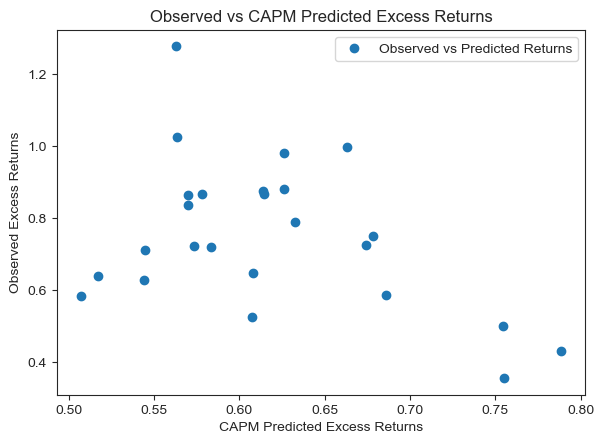

In [89]:
# Plot the 25s Excess returns against Betas
plt.scatter(excess_predicted_CAPM, mean_columns, label='Observed vs Predicted Returns')


plt.xlabel("CAPM Predicted Excess Returns")
plt.ylabel("Observed Excess Returns")
plt.title('Observed vs CAPM Predicted Excess Returns')
plt.legend()
plt.tight_layout(pad=2.0)
plt.savefig("plot3actualvspredicted.png")

plt.show()

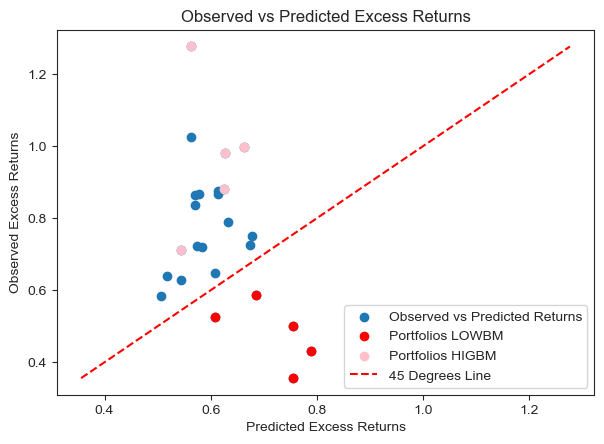

In [90]:
lim_min = min(min(excess_predicted_CAPM), min(mean_columns))
lim_max = max(max(excess_predicted_CAPM), max(mean_columns))

#Plot the 25s Excess returns against Betas
plt.scatter(excess_predicted_CAPM, mean_columns, label='Observed vs Predicted Returns')

# Color points LOWBM
color_index1 = [0, 5, 10, 15, 20]
for index1 in color_index1:
    plt.scatter(excess_predicted_CAPM[index1], mean_columns[index1], color='red')
plt.scatter([], [], color='red', label='Portfolios LOWBM')

# Color points HIGBM
color_index2 = [4, 9, 14, 19, 24]
for index2 in color_index2:
    plt.scatter(excess_predicted_CAPM[index2], mean_columns[index2], color='pink')
plt.scatter([], [], color='pink', label='Portfolios HIGBM')

#Plot the 45 degree line
plt.plot([lim_min, lim_max], [lim_min, lim_max], linestyle='--', color='red', label='45 Degrees Line')


plt.xlabel("Predicted Excess Returns")
plt.ylabel("Observed Excess Returns")
plt.title('Observed vs Predicted Excess Returns')
plt.legend()
plt.tight_layout(pad=2.0)
plt.savefig("plot4actualvspredicted.png")

plt.show()

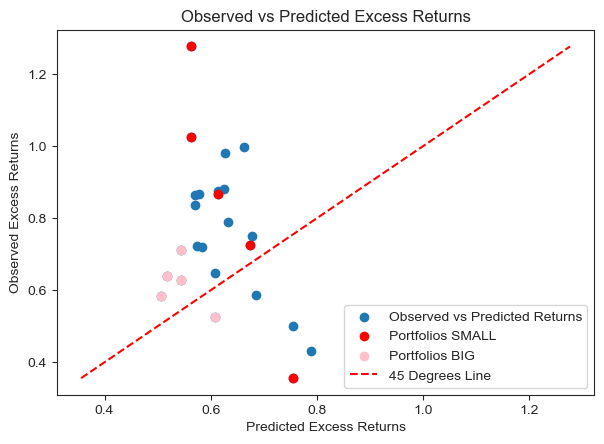

In [91]:
#Plot the 25s Excess returns against Betas
plt.scatter(excess_predicted_CAPM, mean_columns, label='Observed vs Predicted Returns')

# Color points SMALL
color_index3 = [0, 1, 2, 3, 4]
for index3 in color_index3:
    plt.scatter(excess_predicted_CAPM[index3], mean_columns[index3], color='red')
plt.scatter([], [], color='red', label='Portfolios SMALL')


# Color points BIG
color_index4 = [20, 21, 22, 23, 24] 
for index4 in color_index4:
    plt.scatter(excess_predicted_CAPM[index4], mean_columns[index4], color='pink')
plt.scatter([], [], color='pink', label='Portfolios BIG')

#Plot the 45 degree line
plt.plot([lim_min, lim_max], [lim_min, lim_max], linestyle='--', color='red', label='45 Degrees Line')


plt.xlabel("Predicted Excess Returns")
plt.ylabel("Observed Excess Returns")
plt.title('Observed vs Predicted Excess Returns')
plt.legend()
plt.tight_layout(pad=2.0)
plt.savefig("plot5actualvspredicted.png")


plt.show()

# PART 3: 
## Run Fama-French regressions (adding SMB and HML to the CAPM regressions, which already are excess returns). Plot the results (a scatter plot of predicted against actual average excess returns.

In [92]:
# List of the portfolios

portfolios = ['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3','ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3', 'ME4 BM4','ME4 BM5','BIG LoBM','ME5 BM2','ME5 BM3','ME5 BM4','BIG HiBM']

# Dictionary in which to save the regression results:
regression_results_ff = {}

# Iterate over all portfolios
for portfolio_of_interest in portfolios:
    # Dependent Variable: portfolio excess return
    y_ff = df_excess_returns[portfolio_of_interest]

    # Independent Variable: market excess return, SMB, HML with first column of ones
    X_ff = sm.add_constant(df_conc[['Mkt-RF', 'SMB', 'HML']])

    # Solve the equation using Matrix Algebra
    beta_ff = np.linalg.inv(X_ff.T @ X_ff) @ X_ff.T @ y_ff

    # Extract Alfas, Betas for Mkt-RF, Betas for SMB, Betas for HML
    alfa_ff = beta_ff[0]
    beta_mkt_rf_ff = beta_ff[1]
    beta_smb_ff = beta_ff[2]
    beta_hml_ff = beta_ff[3]

    # Save the results in the Dictionary
    regression_results_ff[portfolio_of_interest] = {
        'Alfa': alfa_ff,
        'Beta_Mkt-RF': beta_mkt_rf_ff,
        'Beta_SMB': beta_smb_ff,
        'Beta_HML': beta_hml_ff
    }

# Print the results
for portfolio_of_interest, results in regression_results_ff.items():
    print(f'Results for portfolio {portfolio_of_interest}:')
    print(f'Alfa (α): {results["Alfa"]}')
    print(f'Beta_Mkt-RF (β): {results["Beta_Mkt-RF"]}')
    print(f'Beta_SMB (β): {results["Beta_SMB"]}')
    print(f'Beta_HML (β): {results["Beta_HML"]}')
    print()

Results for portfolio SMALL LoBM:
Alfa (α): -0.4125681518484492
Beta_Mkt-RF (β): 1.0613868559738766
Beta_SMB (β): 1.4441062751983145
Beta_HML (β): -0.14764031171554828

Results for portfolio ME1 BM2:
Alfa (α): -0.042194737575282554
Beta_Mkt-RF (β): 0.9757075424198768
Beta_SMB (β): 1.303468643696009
Beta_HML (β): 0.0900847584056022

Results for portfolio ME1 BM3:
Alfa (α): 0.08415637944723199
Beta_Mkt-RF (β): 0.9282056010550536
Beta_SMB (β): 1.1518756538753183
Beta_HML (β): 0.30948335075029876

Results for portfolio ME1 BM4:
Alfa (α): 0.2442101844461847
Beta_Mkt-RF (β): 0.8684113185014596
Beta_SMB (β): 1.0919606518418574
Beta_HML (β): 0.45176769112444254

Results for portfolio SMALL HiBM:
Alfa (α): 0.43705229425592745
Beta_Mkt-RF (β): 0.8772350941296094
Beta_SMB (β): 1.1489438793940436
Beta_HML (β): 0.6009692519901279

Results for portfolio ME2 BM1:
Alfa (α): -0.28975481434744177
Beta_Mkt-RF (β): 1.1775687913934763
Beta_SMB (β): 1.047571228136822
Beta_HML (β): -0.3126570896444855

Resul

In [93]:
# Dictionary in which to save Fama-French Regression Results for each Portfolio 
regression_results_ff = {}

# Iterate over all portfolios
for portfolio_of_interest in portfolios:
    # Dependent Variable: Portfolio Excess Return
    y_ff = df_excess_returns[portfolio_of_interest]

    # Independent Variable: (Market-RF, SMB, HML) with 1 column of ones
    X_ff = sm.add_constant(df_conc[['Mkt-RF', 'SMB', 'HML']])

    # Solve the equation using Matrix Algebra
    beta_ff = np.linalg.inv(X_ff.T @ X_ff) @ X_ff.T @ y_ff

    # Extract Alfa, Beta for Market-RF, SMB, HML
    alfa_ff = beta_ff[0]
    beta_mkt_rf_ff = beta_ff[1]
    beta_smb_ff = beta_ff[2]
    beta_hml_ff = beta_ff[3]

    # Save the results in the Dictionary
    regression_results_ff[portfolio_of_interest] = {
        'Alfa': alfa_ff,
        'Beta_Mkt-RF': beta_mkt_rf_ff,
        'Beta_SMB': beta_smb_ff,
        'Beta_HML': beta_hml_ff}

# Dictionary in which to save Fama-French Predicted Excess Returns 
predicted_excess_returns_ff = {}

# Iterate over all portfolios
for portfolio_of_interest in portfolios:
    # Extract the result of Fama-French regression for the current portfolio
    portfolio_results_ff = regression_results_ff[portfolio_of_interest]

    # Rendimento del mercato, SMB, HML
    market_return_ff = df_conc['Mkt-RF']
    smb_return_ff = df_conc['SMB']
    hml_return_ff = df_conc['HML']

    # Calculate Predicted Excess Returns using estimated coefficients
    predicted_excess_returns_ff[portfolio_of_interest] = (
        portfolio_results_ff['Beta_Mkt-RF'] * market_return_ff +
        portfolio_results_ff['Beta_SMB'] * smb_return_ff +
        portfolio_results_ff['Beta_HML'] * hml_return_ff)

# Print Fama-French Excess Returns for each Portfolio 
for portfolio_of_interest, returns_ff in predicted_excess_returns_ff.items():
    print(f'Predicted return according to Fama-French for the portfolio {portfolio_of_interest}:')
    print(returns_ff)
    print()

Predicted return according to Fama-French for the portfolio SMALL LoBM:
0     -4.800738
1      2.263263
2     -2.003610
3     -1.016238
4      5.605165
         ...   
760    3.836280
761    9.118869
762    5.803991
763   -6.943592
764   -9.410787
Length: 765, dtype: float64

Predicted return according to Fama-French for the portfolio ME1 BM2:
0     -3.835754
1      1.632483
2     -2.493952
3     -1.456743
4      4.288091
         ...   
760    1.744628
761    8.286990
762    6.213484
763   -6.546392
764   -8.247485
Length: 765, dtype: float64

Predicted return according to Fama-French for the portfolio ME1 BM3:
0     -3.211091
1      1.076154
2     -2.987275
3     -1.924253
4      3.144683
         ...   
760   -0.209820
761    7.689631
762    6.647418
763   -6.186391
764   -7.284591
Length: 765, dtype: float64

Predicted return according to Fama-French for the portfolio ME1 BM4:
0     -2.523399
1      0.701030
2     -3.278768
3     -2.165586
4      2.359175
         ...   
760   -1.4

In [94]:
# Dictionary with predicted Fama-French Data for each Portfolio
predicted_data_ff = {
    'Market_Return': df_conc['Mkt-RF'],
    'SMB_yield': df_conc['SMB'],
    'Yield_HML': df_conc['HML']}

# Add predicted Fama-French Data for each Portfolio to the Dictionary 
for portfolio_of_interest in portfolios:
    predicted_data_ff[portfolio_of_interest] = (
        regression_results_ff[portfolio_of_interest]['Beta_Mkt-RF'] * df_conc['Mkt-RF'] +
        regression_results_ff[portfolio_of_interest]['Beta_SMB'] * df_conc['SMB'] +
        regression_results_ff[portfolio_of_interest]['Beta_HML'] * df_conc['HML'])

# Create a Data Frame using the Dictionary 
df_predicted_data_ff = pd.DataFrame(predicted_data_ff)

# Print DataFrame
print(df_predicted_data_ff)

     Market_Return  SMB_yield  Yield_HML  SMALL LoBM   ME1 BM2   ME1 BM3  \
0            -6.98       2.09       2.78   -4.800738 -3.835754 -3.211091   
1             1.17       0.51      -1.93    2.263263  1.632483  1.076154   
2            -1.63      -0.49      -2.94   -2.003610 -2.493952 -2.987275   
3            -1.71       0.32      -2.28   -1.016238 -1.456743 -1.924253   
4             3.12       1.21      -3.70    5.605165  4.288091  3.144683   
..             ...        ...        ...         ...       ...       ...   
760           0.35       1.61      -7.72    3.836280  1.744628 -0.209820   
761           6.46       1.54      -0.26    9.118869  8.286990  7.689631   
762           3.21       2.08       4.11    5.803991  6.213484  6.647418   
763          -2.39      -3.16      -1.06   -6.943592 -6.546392 -6.186391   
764          -5.24      -2.51       1.52   -9.410787 -8.247485 -7.284591   

      ME1 BM4  SMALL HiBM   ME2 BM1   ME2 BM2  ...   ME4 BM1   ME4 BM2  \
0   -2.523399

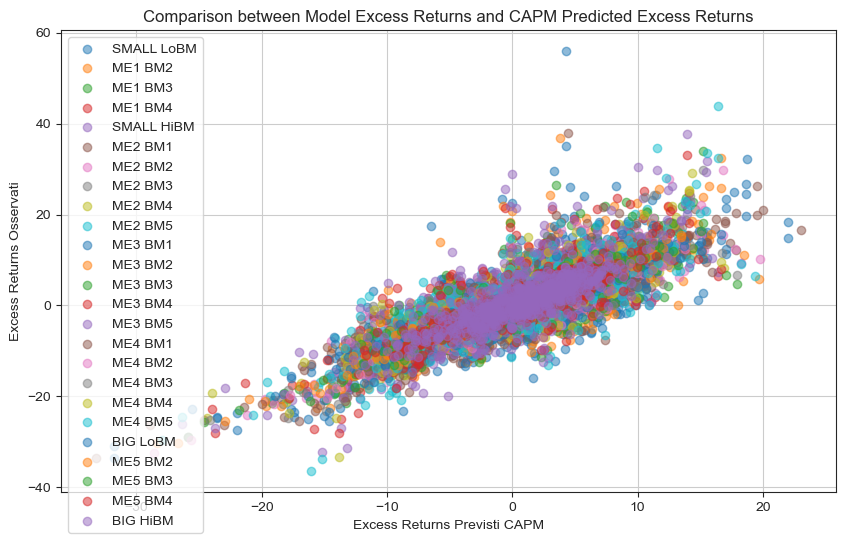

In [95]:
# Create scatter plot
plt.figure(figsize=(10, 6))

for portfolio_of_interest in portfolios:
    # Extract observed and predicted data for the current portfolio
    observed_data2 = df_excess_returns[portfolio_of_interest]
    predicted_CAPM2 = df_predicted_excess_returns[portfolio_of_interest]


    # Draw a scatter plot
    plt.scatter(predicted_CAPM2, observed_data2, label=portfolio_of_interest, alpha=0.5)
    
    
plt.xlabel('Excess Returns Previsti CAPM')
plt.ylabel('Excess Returns Osservati')
plt.title('Comparison between Model Excess Returns and CAPM Predicted Excess Returns')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
excessdf_predicted_data_ff= df_predicted_data_ff.mean().tolist()
excessdf_predicted_data_ffS = excessdf_predicted_data_ff[3:]

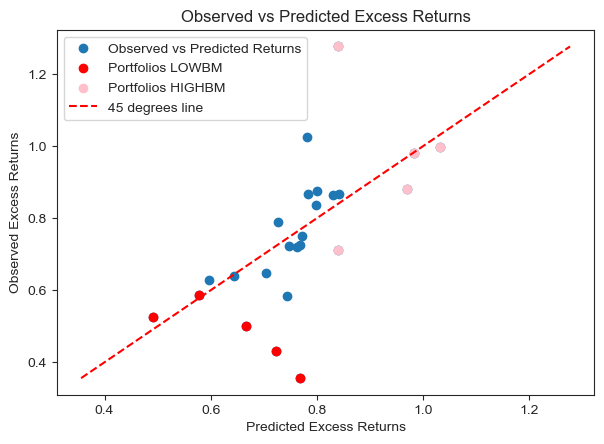

In [97]:
#Plot the 25s Excess returns against Betas
plt.scatter(excessdf_predicted_data_ffS, mean_columns, label='Observed vs Predicted Returns')

# Color points SMALL
for index5 in color_index1:
    plt.scatter(excessdf_predicted_data_ffS[index5], mean_columns[index5], color='red')
plt.scatter([], [], color='red', label='Portfolios LOWBM')

# Color points BIG
for index6 in color_index2:
    plt.scatter(excessdf_predicted_data_ffS[index6], mean_columns[index6], color='pink')
plt.scatter([], [], color='pink', label='Portfolios HIGHBM')

#Draw the 45 degree line
plt.plot([lim_min, lim_max], [lim_min, lim_max], linestyle='--', color='red', label='45 degrees line')

plt.xlabel("Predicted Excess Returns")
plt.ylabel("Observed Excess Returns")
plt.title('Observed vs Predicted Excess Returns')
plt.legend()
plt.tight_layout(pad=2.0)
plt.savefig("plot7french.png")


plt.show()

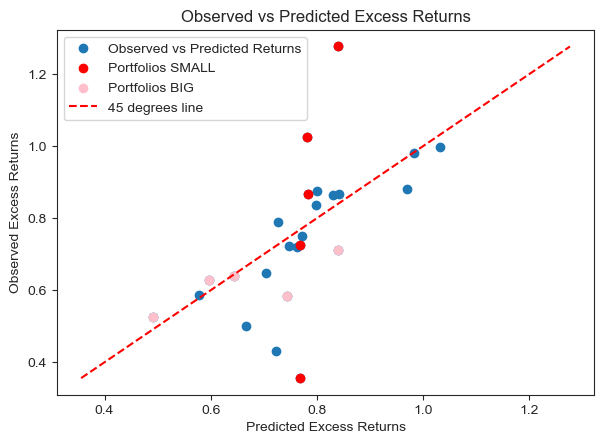

In [98]:
#Plot the 25s Excess returns against Betas
plt.scatter(excessdf_predicted_data_ffS, mean_columns, label='Observed vs Predicted Returns')

# Color points SMALL
for index7 in color_index3:
    plt.scatter(excessdf_predicted_data_ffS[index7], mean_columns[index7], color='red')
plt.scatter([], [], color='red', label='Portfolios SMALL')

# Color points BIG
for index8 in color_index4:
    plt.scatter(excessdf_predicted_data_ffS[index8], mean_columns[index8], color='pink')
plt.scatter([], [], color='pink', label='Portfolios BIG')

#Draw the 45 degree line
plt.plot([lim_min, lim_max], [lim_min, lim_max], linestyle='--', color='red', label='45 degrees line')

plt.xlabel("Predicted Excess Returns")
plt.ylabel("Observed Excess Returns")
plt.title('Observed vs Predicted Excess Returns')
plt.legend()
plt.tight_layout(pad=2.0)
plt.savefig("plot6french.png")

plt.show()

# PART 4 : Finally, run a Fama-McBeth regression to obtain the market price of risk for the three factors and error terms. Carefully watch your econometric procedure, especially with regard to the problem of overlapping observations

In [99]:
data = df_conc
# Split
dates = data['  Average Equal Weighted Returns -- Monthly'].values
factors = data[['Mkt-RF', 'SMB', 'HML']].values
riskfree = data['RF'].values
portfolios = data.iloc[:, 1:26].values

# Use mat for easier linear algebra
factors = mat(factors)
riskfree = mat(riskfree)
portfolios = mat(portfolios)

# Shape information
T,K = factors.shape
T,N = portfolios.shape
# Reshape rf and compute excess returns
riskfree.shape = T,1
excessReturns = portfolios - riskfree

In [100]:
excessReturns

matrix([[ -5.0724,  -4.3209,  -0.9161, ...,  -5.4634,  -5.8698,  -6.371 ],
        [ -2.6624,   1.8279,  -1.2024, ...,   0.3525,  -3.6834,  -4.3663],
        [ -2.5718,  -5.4262,  -4.0587, ...,  -1.293 ,  -3.5961,  -6.4523],
        ...,
        [  0.2334,   0.2899,   1.6185, ...,   3.0718,   5.9426,   4.8674],
        [ -9.1626, -10.4141, -12.4081, ...,  -3.759 ,  -4.6921,  -7.1662],
        [-10.2463, -10.4292,  -8.635 , ...,  -3.8228,  -2.8109,  -3.0363]])

In [101]:
# Time series regressions
X = sm.add_constant(factors)
ts_res = sm.OLS(excessReturns, X).fit()
alpha = ts_res.params[0]
beta = ts_res.params[1:]
avgExcessReturns = mean(excessReturns, 0)
# Cross-section regression
cs_res = sm.OLS(avgExcessReturns.T, beta.T).fit()
riskPremia = cs_res.params

In [102]:
 # ----- begin code from ChatGPT 3.5---

In [103]:
# Moment conditions
X = sm.add_constant(factors)
p = vstack((alpha, beta))
epsilon = excessReturns - X @ p
moments1 = kron(epsilon, ones((1, K + 1)))
moments1 = multiply(moments1, kron(ones((1, N)), X))
u = excessReturns - riskPremia[None,:] @ beta
moments2 = u * beta.T
# Score covariance
S = mat(cov(hstack((moments1, moments2)).T))
# Jacobian
G = mat(zeros((N * K + N + K, N * K + N + K)))
SigmaX = (X.T @ X) / T
G[:N * K + N, :N * K + N] = kron(eye(N), SigmaX)
G[N * K + N:, N * K + N:] = -beta @ beta.T
for i in range(N):
    temp = zeros((K, K + 1))
    values = mean(u[:, i]) - multiply(beta[:, i], riskPremia)
    temp[:, 1:] = diag(values)
    G[N * K + N:, i * (K + 1):(i + 1) * (K + 1)] = temp

vcv = inv(G.T) * S * inv(G) / T

In [104]:
vcvAlpha = vcv[0:N * K + N:4, 0:N * K + N:4]
J = alpha @ inv(vcvAlpha) @ alpha.T
J = J[0, 0]
Jpval = 1 - chi2(25).cdf(J)

In [105]:
vcvRiskPremia = vcv[N * K + N:, N * K + N:]
annualizedRP = 12 * riskPremia
arp = list(squeeze(annualizedRP))
arpSE = list(sqrt(12 * diag(vcvRiskPremia)))
print('        Annualized Risk Premia')
print('           Market       SMB        HML')
print('--------------------------------------')
print('Premia     {0:0.4f}    {1:0.4f}     {2:0.4f}'.format(arp[0], arp[1], arp[2]))
print('Std. Err.  {0:0.4f}    {1:0.4f}     {2:0.4f}'.format(arpSE[0], arpSE[1], arpSE[2]))
print('\n\n')

print('J-test:   {:0.4f}'.format(J))
print('P-value:   {:0.4f}'.format(Jpval))

i = 0
betaSE = []
for j in range(5):
    for k in range(5):
        a = alpha[i]
        b = beta[:, i]
        variances = diag(vcv[(K + 1) * i:(K + 1) * (i + 1), (K + 1) * i:(K + 1) * (i + 1)])
        betaSE.append(sqrt(variances))
        s = sqrt(variances)
        c = hstack((a, b))
        t = c / s
        print('Size: {:}, Value:{:}   Alpha   Beta(VWM)   Beta(SMB)   Beta(HML)'.format(j + 1, k + 1))
        print('Coefficients: {:>10,.4f}  {:>10,.4f}  {:>10,.4f}  {:>10,.4f}'.format(a, b[0], b[1], b[2]))
        print('Std Err.      {:>10,.4f}  {:>10,.4f}  {:>10,.4f}  {:>10,.4f}'.format(s[0], s[1], s[2], s[3]))
        print('T-stat        {:>10,.4f}  {:>10,.4f}  {:>10,.4f}  {:>10,.4f}'.format(t[0], t[1], t[2], t[3]))
        print('')
        i += 1

        Annualized Risk Premia
           Market       SMB        HML
--------------------------------------
Premia     5.5428    2.3834     5.2598
Std. Err.  0.5799    0.4316     0.3915



J-test:   119.6836
P-value:   0.0000
Size: 1, Value:1   Alpha   Beta(VWM)   Beta(SMB)   Beta(HML)
Coefficients:    -0.4126      1.0614      1.4441     -0.1476
Std Err.          0.1389      0.0380      0.0803      0.0656
T-stat           -2.9693     27.9288     17.9908     -2.2517

Size: 1, Value:2   Alpha   Beta(VWM)   Beta(SMB)   Beta(HML)
Coefficients:    -0.0422      0.9757      1.3035      0.0901
Std Err.          0.1055      0.0319      0.0605      0.0541
T-stat           -0.3999     30.6010     21.5580      1.6664

Size: 1, Value:3   Alpha   Beta(VWM)   Beta(SMB)   Beta(HML)
Coefficients:     0.0842      0.9282      1.1519      0.3095
Std Err.          0.0896      0.0265      0.0602      0.0460
T-stat            0.9397     35.0009     19.1278      6.7228

Size: 1, Value:4   Alpha   Beta(VWM)  

In [106]:
# ----- end code from ChatGPT 3.5-----